# Distribuciones.

In [1]:
import pandas as pd
import numpy as np
import re
import ast


In [2]:
#Como estructura de la carpeta de trabajo separe las resoluciones en pdf del excel inicial
path_herramientas = "..\\data\\original\\Resoluciones\\"
path_original = "..\\data\\original\\"

In [3]:
#Para aquellos que deseen chequear donde esta su carpeta de trabajo.
import os
os.getcwd()

'c:\\Users\\fede_\\Desktop\\ODSL\\nlp-juzgado\\notebooks'

In [4]:
set_unificado = pd.read_excel(path_original + "set_de_datos_unificado_juzgado.xlsx")

## Filtro por columna violencia de genero

In [5]:
set_unificado["VIOLENCIA_DE_GENERO"].unique()

array(['no', 'si', nan], dtype=object)

In [6]:
violencia = set_unificado[set_unificado["VIOLENCIA_DE_GENERO"] == "si"]

In [7]:
violencia.shape

(891, 69)

Me quedan 861 casos

In [8]:
violencia.GENERO_DENUNCIANTE.unique()	

array(['femenino', nan], dtype=object)

In [9]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000) 

In [10]:
violencia.head().T

2_8_2016                                           3_8_2016                                          18_8_2016
N_EXPTE_EJE                                                                                   9904_16                                            1313_16                                            3024_14                                           10441_16                                            3756_15
FIRMA                                                                                     Pablo_Casas                                        Pablo_Casas                                        Pablo_Casas                                        Pablo_Casas                                        Pablo_Casas
MATERIA                                                                                         penal                                    contravencional                                              penal                                              penal                                              penal
ART_INFRINGIDO                                                                                 149bis                                                 52                                             149bis                                             149bis                                             149bis
CODIGO_O_LEY                                                                codigo_penal_de_la_nacion                             codigo_contravencional                          codigo_penal_de_la_nacion                          codigo_penal_de_la_nacion                          codigo_penal_de_la_nacion
CONDUCTA                                                                                     amenazas                                      hostigamiento                                           amenazas                                           amenazas                                           amenazas
CONDUCTA_DESCRIPCION                                                                          simples                       agravado_violencia_de_genero                                            simples                                            simples                                            simples
VIOLENCIA_DE_GENERO                                                                                si                                                 si                                                 si                                                 si                                                 si
V_FISICA                                                                                           no                                                 si                                                 no                                                 si                                                 no
V_PSIC                                                                                             si                                                 si                                                 si                                                 si                                                 no
V_ECON                                                                                             no                                                 si                                                 si                                                 no                                                 si
V_SEX                                                                                              no                                                 no                                                 no                                                 no                                                 no
V_SOC                                                                                              no                                                 no                                                 si              

### correlacion

No soy abogado pero la primera pregunta que me hago es si hay un tipo de correlacion entre el tipo de violencia, la conducta y el articulo infringido

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
#Correlacion
dataframe = violencia[["ART_INFRINGIDO", "CONDUCTA","V_FISICA","V_PSIC","V_ECON","V_SEX","V_SOC","V_AMB","V_SIMB"]]


In [13]:
print(len(dataframe.CONDUCTA.unique()))
dataframe.CONDUCTA.unique()

25


array(['amenazas', 'hostigamiento', 'incumplimiento_deberes_familiares',
       'daños', 'usurpacion', 'Hostigamiento',
       'ingreso_a_domicilio_sin_autorizacion', 'lesiones',
       'exhibiciones_obscenas', 'tenencia_de_arma',
       'acoso_sexual_callejero', 'robo', 'desobediencia_a_la_autoridad',
       'impedimento_de_contacto_de_menor_con_padre_no_conviviente',
       'abuso_sexual', 'incendios_y_otros_estragos',
       'atentado_contra_la_autoridad', 'abuso_de_armas',
       'abuso_de_autoridad_e_incumplimiento_deberes_funcionario_publico',
       'desobediencia_a_cargas_procesales',
       'privacion_ilegitima_de_la_libertad', 'hurto_con_escalamiento',
       'maltrato', 'portacion_de_arma', 'hurto'], dtype=object)

In [14]:
print(len(dataframe.ART_INFRINGIDO.unique()))
dataframe.ART_INFRINGIDO.unique()

31


array(['149bis', '52', '1', '183', '181_inc1', '150', '53_inc5', '92',
       '129', '189bis', '65bis', '164', '239', '89', '149bis_129', '119',
       '186', '149bis_parr2', '149ter_inc2b)', '238', '181_inc3', '67bis',
       '104', '248', '243', '141', '163_inc4', '53_inc3', '90', '163',
       '162'], dtype=object)

In [15]:
dataframe = dataframe.replace("no", 0)
dataframe = dataframe.replace("si", 1)

In [16]:
articulo = dataframe[["CONDUCTA","ART_INFRINGIDO"]]

In [17]:
articulo

CONDUCTA ART_INFRINGIDO
1                                              amenazas         149bis
2                                         hostigamiento             52
4                                              amenazas         149bis
9                                              amenazas         149bis
20                                             amenazas         149bis
...                                                 ...            ...
3347                                      hostigamiento             52
3348                  incumplimiento_deberes_familiares              1
3354  impedimento_de_contacto_de_menor_con_padre_no_...              1
3355                                   tenencia_de_arma         189bis
3358                                           amenazas         149bis

[891 rows x 2 columns]

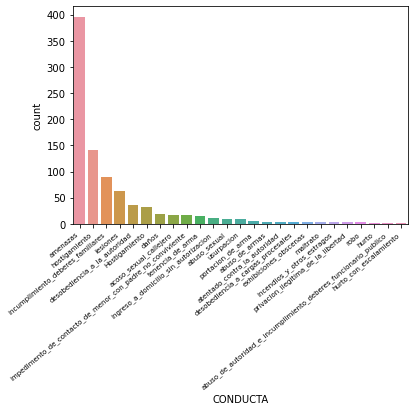

In [18]:
#articulo.groupby('CONDUCTA').count()
ax = sns.countplot(data = articulo, x = 'CONDUCTA',
              order = articulo['CONDUCTA'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=7, rotation=40, ha="right")
plt.show()


In [19]:
grafico_data = pd.crosstab(index=articulo["CONDUCTA"], 
                     columns="count")                  
grafico_data.sort_values(by = ['count'], ascending = [False])

col_0                                               count
CONDUCTA                                                 
amenazas                                              396
hostigamiento                                         142
incumplimiento_deberes_familiares                      90
lesiones                                               63
desobediencia_a_la_autoridad                           36
Hostigamiento                                          32
daños                                                  18
acoso_sexual_callejero                                 17
impedimento_de_contacto_de_menor_con_padre_no_c...     16
tenencia_de_arma                                       15
ingreso_a_domicilio_sin_autorizacion                   12
usurpacion                                              9
abuso_sexual                                            9
portacion_de_arma                                       6
abuso_de_armas                                          4
atentado_contra_la_autoridad                            4
exhibiciones_obscenas                                   3
incendios_y_otros_estragos                              3
desobediencia_a_cargas_procesales                       3
maltrato                                                3
privacion_ilegitima_de_la_libertad                      3
robo                                                    3
hurto                                                   2
hurto_con_escalamiento                                  1
abuso_de_autoridad_e_incumplimiento_deberes_fun...      1

# Cuestion interesante

¿Una misma conducta tiene articulos distintos infringidos? Si hay pocos casos con Articulos distinto al resto y la misma conducta podríamos entenderlo en la concepción estadística de Outlier. Este caso atípico tiene lógica o esta mal tipificada la conducta o el articulo? En casos de que nuestro dataset sea pequeño puede ser que sea simplemente una posibilidad con baja probabilidad.

In [21]:
group_by_cond_art =  articulo.groupby(['CONDUCTA','ART_INFRINGIDO'])

In [22]:
correlacion = pd.DataFrame(group_by_cond_art.size().reset_index(name = "Group_Count"))
correlacion

CONDUCTA ART_INFRINGIDO  Group_Count
0                                       Hostigamiento             52           30
1                                       Hostigamiento        53_inc5            2
2                                      abuso_de_armas            104            4
3   abuso_de_autoridad_e_incumplimiento_deberes_fu...            248            1
4                                        abuso_sexual            119            9
5                              acoso_sexual_callejero          65bis            5
6                              acoso_sexual_callejero          67bis           12
7                                            amenazas         149bis          380
8                                            amenazas     149bis_129            1
9                                            amenazas   149bis_parr2           14
10                                           amenazas  149ter_inc2b)            1
11                       atentado_contra_la_autoridad            238            4
12                                              daños            183           18
13                  desobediencia_a_cargas_procesales            243            3
14                       desobediencia_a_la_autoridad            239           36
15                              exhibiciones_obscenas            129            3
16                                      hostigamiento             52          125
17                                      hostigamiento        53_inc3            1
18                                      hostigamiento        53_inc5           16
19                                              hurto            162            1
20                                              hurto            163            1
21                             hurto_con_escalamiento       163_inc4            1
22  impedimento_de_contacto_de_menor_con_padre_no_...              1           16
23                         incendios_y_otros_estragos            186            3
24                  incumplimiento_deberes_familiares              1           90
25               ingreso_a_domicilio_sin_autorizacion            150           12
26                                           lesiones             89           14
27                                           lesiones             90            1
28                                           lesiones             92           48
29                                           maltrato        53_inc5            3
30                                  portacion_de_arma         189bis            6
31                 privacion_ilegitima_de_la_libertad            141            3
32                                               robo            164            3
33                                   tenencia_de_arma         189bis           15
34                                         usurpacion       181_inc1            6
35                                         usurpacion       181_inc3            3

# Tipos de violencia.

Podemos analizar los tipos de violencia en relacion a la conducta y a la ley.

## Problemas respecto al perfil del denunciado

https://reason.com/2019/01/14/chief-justice-robots/ <br/>
https://reason.com/wp-content/uploads/assets/db/15474336323990.pdf <br/>

https://www.theverge.com/2020/6/24/21301465ai-machine-learning-racist-crime-prediction-coalition-critical-technology-springer-study  <br/>

https://scholarship.law.duke.edu/dlj/vol68/iss6/1/  <br/>


https://arxiv.org/pdf/1808.00023.pdf


 8.   CODIGO_O_LEY                                         891 non-null    object 
 9.   CONDUCTA                                             891 non-null    object 
 10.  CONDUCTA_DESCRIPCION                                 553 non-null    object 
 11.  VIOLENCIA_DE_GENERO                                  891 non-null    object 
 12.  V_FISICA                                             890 non-null    object 
 13.  V_PSIC                                               890 non-null    object 
 14.  V_ECON                                               890 non-null    object 
 15.  V_SEX                                                890 non-null    object 
 16.  V_SOC                                                890 non-null    object 
 17.  V_AMB                                                890 non-null    object 
 18.  V_SIMB                                               890 non-null    object 
 19.  FRASES_AGRESION                                      636 non-null    object 
 20.  GENERO_ACUSADO/A                                     890 non-null    object 
 21.  NACIONALIDAD_ACUSADO/A                               890 non-null    object 
 22.  EDAD_ACUSADO/A AL MOMENTO DEL HECHO                  890 non-null    object 
 23.  NIVEL_INSTRUCCION_ACUSADO/A                          890 non-null    object 
 24.  GENERO_DENUNCIANTE                                   890 non-null    object 
 25.  NACIONALIDAD_DENUNCIANTE                             890 non-null    object 
 26.  EDAD_DENUNCIANTE_AL_MOMENTO_DEL_HECHO                890 non-null    object 
 27.  NIVEL_INSTRUCCION_DENUNCIANTE                        890 non-null    object 
 28.  DOMICILIO_DENUNCIANTE                                890 non-null    object 
 29.  ASENTAMIENTO_O_VILLA                                 890 non-null    object 
 30.  FRECUENCIA_EPISODIOS                                 890 non-null    object 

Selecciono en el dataset los items referidos a tipos de violencia, conductas y articulos infringidos. Entiendo que debería haber una relación entre ellos. 

In [23]:
dataframe.head()

ART_INFRINGIDO       CONDUCTA V_FISICA V_PSIC V_ECON V_SEX V_SOC V_AMB V_SIMB
1          149bis       amenazas        0      1      0     0     0     0      1
2              52  hostigamiento        1      1      1     0     0     0      1
4          149bis       amenazas        0      1      1     0     1     0      1
9          149bis       amenazas        1      1      0     0     1     0      1
20         149bis       amenazas        0      0      1     0     0     0      0

In [24]:
tipos_v = dataframe.loc[:, dataframe.columns != 'CONDUCTA']


In [25]:
tipos_v.isnull().sum(axis=0)

ART_INFRINGIDO    0
V_FISICA          1
V_PSIC            1
V_ECON            1
V_SEX             1
V_SOC             1
V_AMB             1
V_SIMB            1
dtype: int64

In [26]:
#Remplazos nulos y s/d por 0
tipos_v = tipos_v.fillna(0)
tipos_v = tipos_v.replace("s/d",0)

In [27]:
#Creo una tabla de contingencia que luego utilizaré en el heatmap
tabla = tipos_v.groupby(['ART_INFRINGIDO'], as_index=True).sum()
tabla = tabla.div(tabla.sum(1), 0).assign(Total=lambda tabla: tabla.sum(axis=1))
#.mul(100).round(2)
#tabla

Text(0.5, 1.0, '% de violencia por Articulo Infringido')

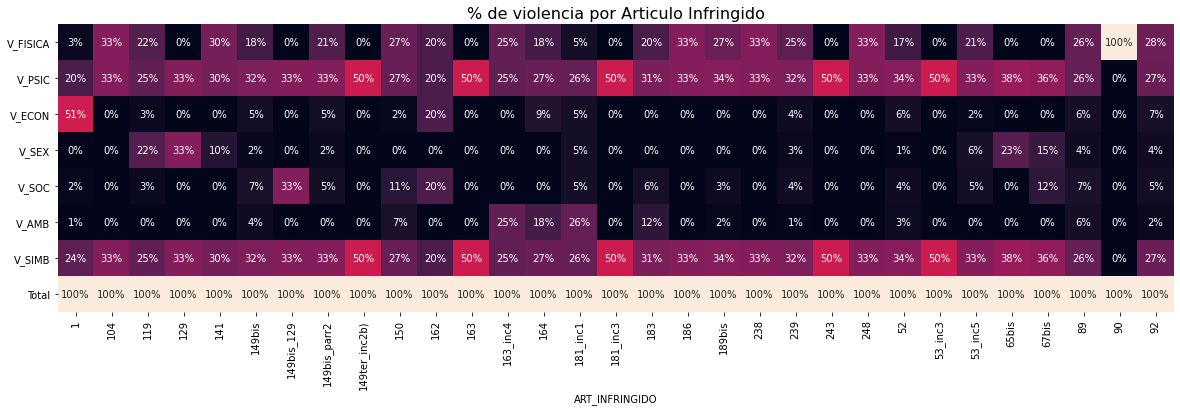

In [28]:
tabla2 = tabla.transpose()

plt.figure(figsize = (20,20))
sns.heatmap(tabla2,annot = True,square = True,   fmt='.0%', cbar = False)

plt.title('% de violencia por Articulo Infringido', fontsize = 16) 



In [29]:
tipos_coduct = dataframe.loc[:, dataframe.columns != 'ART_INFRINGIDO']
tipos_coduct.isnull().sum(axis=0)

CONDUCTA    0
V_FISICA    1
V_PSIC      1
V_ECON      1
V_SEX       1
V_SOC       1
V_AMB       1
V_SIMB      1
dtype: int64

In [30]:
tipos_coduct = tipos_coduct.fillna(0)
tipos_coduct = tipos_coduct.replace("s/d",0)

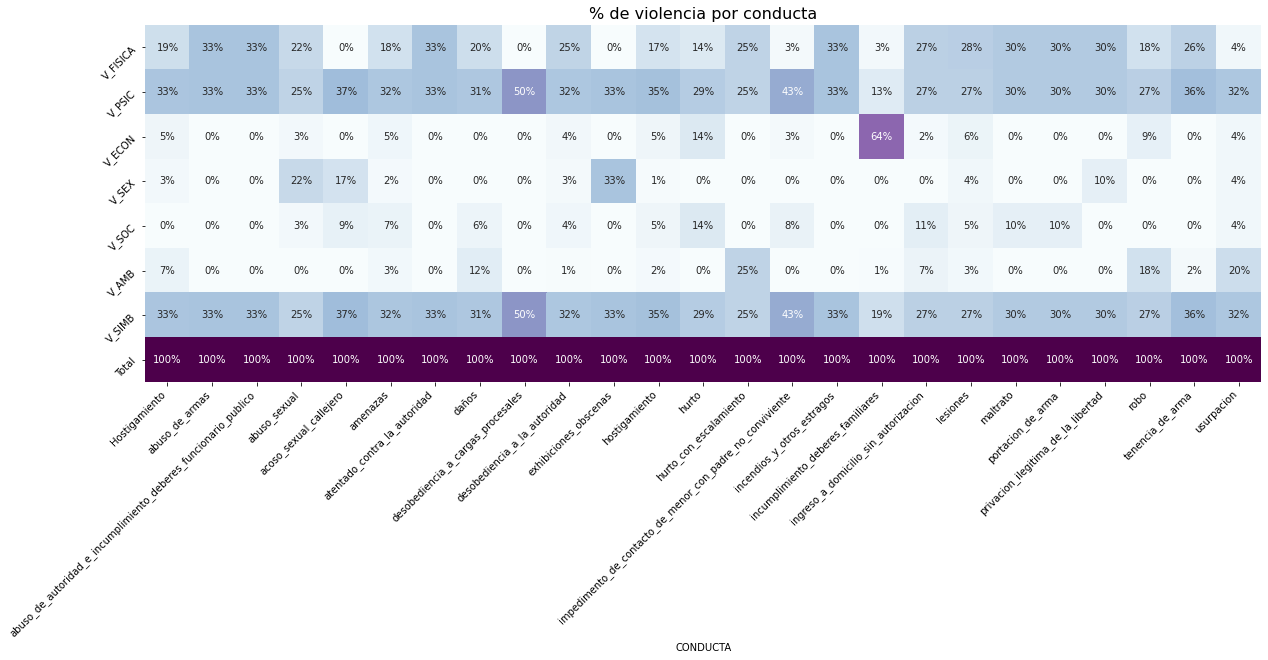

In [31]:
tabla_conducta = tipos_coduct.groupby(['CONDUCTA'], as_index=True).sum()
tabla_conducta = tabla_conducta.div(tabla_conducta.sum(1), 0).assign(Total=lambda tabla: tabla.sum(axis=1))
tabla_conducta_t = tabla_conducta.transpose()


plt.figure(figsize = (20,20))
htmap = sns.heatmap(tabla_conducta_t,annot = True,square = True,   fmt='.0%', cbar = False, cmap="BuPu")

#htmap.set_xticklabels(htmap.get_xticklabels(), rotation=45, horizontalalignment='right')

htmap.set_yticklabels(htmap.get_yticklabels(), rotation=45, horizontalalignment='right')

plt.title('% de violencia por conducta', fontsize = 16) 

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
     
)

htmap


A la hora de armar un clasificador es interesante entender como esta compuesta cada conducta. Se observa que tanto violencia simbolica, como violencia psicologica se hacen presentes casi en toda las categorias de conductas.